# Notebook Day!

## nb13 and the associated data set are on Canvas and the course schedule


#### Last time in lecture: CLT and Bessel's Correction.

### Part 1: The CLT


**Example**:The amount of impurity in a batch of a chemical product is a random variable with mean value 4.0 g and standard deviation 1.5 g. (unknown distribution)


If 50 batches are independently prepared, what is the (approximate) probability that the average amount of impurity in these 50 batches is between 3.5 and 3.8 g?\\

**Exercise**: Suppose each batch is normally distributed.  What is the distribution $X$ for each batch, and what is $P(3.5<X<3.8)$?  Make a plot depicting this probability.

What is the distribution of $\bar{X}$ for a set of 50 batches, and what is $P(3.5<\bar{X}<3.8)$?  Make a plot depicting this probability.

*Intuition*:  Which probability is larger?  This likely depends on whether or not the tested values for $X, \bar{X}$ are *close to the mean* of 4.0 or not!

**Pen and Paper Solution:**


We want the probability $P(3.5<X<3.8)$ for $X \sim N(4.0, 1.5^2)$.  Normalize by "replacing" all 3 values in the equality with $\frac{\#-4.0}{1.5}$, so we get
$$P(3.5<X<3.8)=P\left(\frac{3.5-4.0}{1.5}<\frac{X-4.0}{1.5}<\frac{3.8-4.0}{1.5}\right)=P\left(\frac{-.5}{1.5}<Z<\frac{-.2}{1.5}\right) $$

**(and for $\bar{X}$)**:

We want the probability $P(3.5<\bar{X}<3.8)$ for $X \sim N(4.0, 1.5^2)$.  Again we normalize... but $\bar{X}$ has much smaller standard deviation than each one of the individual data values!
		$$P(3.5<\bar{X}<3.8)=P\left( \frac{3.5-4.0}{1.5/\sqrt{50}}<\frac{\bar{X}-4.0}{1.5/\sqrt{50}}<\frac{3.8-4.0}{1.5/\sqrt{50}}\right) $$
		$$=P\left( \frac{-1}{3/\sqrt{50}}<Z< \frac{-2}{15/\sqrt{50}}\right) $$ for $Z \sim N(0,1)$ which is
		$$\Phi\left( \frac{-2}{15/\sqrt{50}}\right) -\Phi\left( \frac{-1}{3/\sqrt{50}}\right) $$

In [1]:
##Get them normals in here
import numpy as np 
import pandas as pd 
from scipy import stats
import matplotlib.pylab as plt 
%matplotlib inline

0.36944134018176367 0.446964883376386 0.07752354319462235


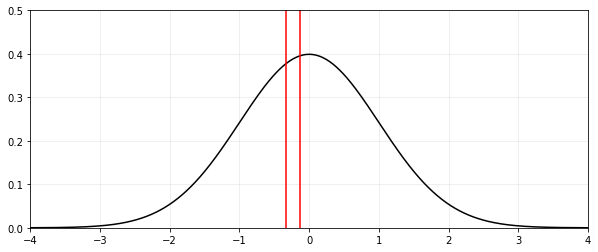

In [2]:
##Opening example: mean of 4, sd of 1.5, asking P(3.5<x<3.8)
Phi_b=stats.norm.cdf(-2/15)
Phi_a=stats.norm.cdf(-1/3)
print(Phi_a, Phi_b, Phi_b-Phi_a)

#Visually...
x = np.linspace(-4,4,500)
f = stats.norm.pdf(x, 0, 1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-4,4+1));
ax.set_xlim([-4,4])
ax.set_ylim([0,.5])
ax.plot(x,f,color="black");
plt.axvline(-2/15, color='red')
plt.axvline(-1/3, color='red')

2.7972786180957397e-26 1.24133031694023e-05 1.24133031694023e-05


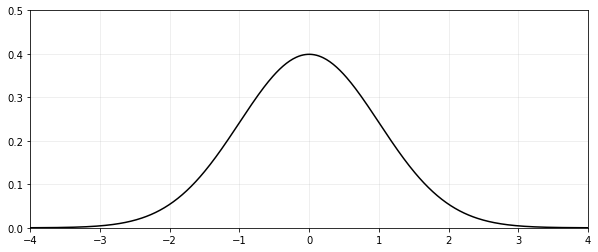

In [8]:
##Opening example with n=50:
nsamp=1000
Phi_b2=stats.norm.cdf(-2*np.sqrt(nsamp)/15)
Phi_a1=stats.norm.cdf(-1*np.sqrt(nsamp)/3)
print(Phi_a1, Phi_b2, Phi_b2-Phi_a1)


x = np.linspace(-4,4,500)
f = stats.norm.pdf(x, 0, 1)
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
plt.xticks(range(-4,4+1));
ax.set_xlim([-4,4])
ax.set_ylim([0,.5])
ax.plot(x,f,color="black");
plt.axvline(-2/15*np.sqrt(nsamp), color='red')
plt.axvline(-1/3*np.sqrt(nsamp), color='red')

## Sampling Distributions of Means

http://onlinestatbook.com/stat_sim/sampling_dist/index.html




#### And now we do it ourselves, using underlying exponentials!

(array([ 0.36004915,  2.36032221,  8.5011605 , 20.0827415 , 28.04382827,
        24.76338046, 12.30167931,  2.9404014 ,  0.60008192,  0.06000819]),
 array([2.95341624, 2.96341487, 2.97341351, 2.98341214, 2.99341078,
        3.00340941, 3.01340805, 3.02340668, 3.03340532, 3.04340395,
        3.05340259]),
 <BarContainer object of 10 artists>)

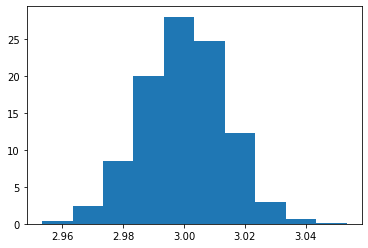

In [15]:
## Lets simulate!
nsamp=5000 #times to repeat experiment.  Should be big!
ntrial=500 #trials per "experiment": vary to watch CLT in action!
df = pd.DataFrame(np.random.exponential(3,size=(nsamp, ntrial)))  #nsamp rows, ntrial columns.
#Note: Python usage of exponential is to specify the mean, so this is lambda=1/3
means=df.apply(np.mean, axis=1) #apply means over rows
plt.hist(means, density=True) #show histogram of the means

### Part 2: Bias and Bessel's

Let's create a simulation to demonstrate that if we used the wrong formula for variance, we'd *systematically* underestimate the true value.

In particular, suppose we have Exponentials, as above.  For an exponential with parameter $\lambda$, a look at the properties tells us that the mean is $1/\lambda$ and the variance is $1/\lambda^2$.

So imagine we have $n$ "exponentials."  If we compute

$$s^2=\frac{\sum (X_i -\bar{X})^2}{n-1}$$
we should **on average** get $1/\lambda^2$.

But if we compute 

$$\hat{\sigma^2}=\frac{\sum (X_i -\bar{X})^2}{n}$$
we should **on average** underestimate the variance!

In [16]:
## Lets simulate!
nsamp=5000 #times to repeat experiment.  Should be big!
ntrial=5 #trials per "experiment":
lam=1/5 # rate of events;
true_var=1/lam**2
df = pd.DataFrame(np.random.exponential(1/lam,size=(nsamp, ntrial)))  #nsamp rows, ntrial columns.
#Note: Python usage of exponential is to specify the mean, so this is scale=1/lambda
variances=df.apply(np.var, ddof=0, axis=1) #apply variances over columns
#mean the variances
print('Sample biased variance', np.mean(variances), 'True variance', true_var) #show histogram of the means

Sample biased variance 20.317069472930022 True variance 24.999999999999996


### Part 2: Bias and Bessel's

This type of error is called **bias**, and it's super common!  Suppose we wanted to estimate $\lambda$ in this same kind of experiment.  This is a real problem!  "Suppose we *think* our data might be coming from an exponential distribution.  Estimate the correct value of $\lambda$ for that distribution."

Since the $E[X]=1/\lambda$ and $\bar{X}$ is usually a good way to estimate $\mu$ , the natural guess for $\lambda$ might be $\hat{\lambda}=1/\bar{X}$.

But check out what happens, playing with $n$ and $\lambda$ as before:


In [76]:
## Lets simulate!
nsamp=5000 #times to repeat experiment.  Should be big!
ntrial=10 #trials per "experiment":
lam=1/5 # rate of events;
true_mean=1/lam
df = pd.DataFrame(np.random.exponential(1/lam,size=(nsamp, ntrial)))  #nsamp rows, ntrial columns.
#Note: Python usage of exponential is to specify the mean, so this is scale=1/lambda
lam_est=1/df.apply(np.mean, axis=1) #apply 1/mean over columns
#mean those values
print('For a lambda of', lam, ' and a sample of size ', ntrial)
print('Lambda estimate', np.mean(lam_est)) #show histogram of the means

For a lambda of 0.2  and a sample of size  10
Lambda estimate 0.22158374038993975


Just like with variances, you might notice something that looks a lot like $1/n$ floating around in there...  Simulation is one of our best ways to figure out if something is "wrong" with our process of estimation.  If we can simulate from something, we know what the "right" answer is supposed to be, so we can use it to fix any problems with our techniques.